In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load datasets
train = pd.read_csv('train.csv')

FileNotFoundError: ignored

In [8]:
train.shape

(6036000, 8)

In [9]:
test = pd.read_csv('test.csv')

FileNotFoundError: ignored

In [ ]:
test.shape

(4024000, 7)

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6036000 entries, 0 to 6035999
Data columns (total 8 columns):
 #   Column     Dtype  
---  ------     -----  
 0   id         int64  
 1   breath_id  int64  
 2   R          int64  
 3   C          int64  
 4   time_step  float64
 5   u_in       float64
 6   u_out      int64  
 7   pressure   float64
dtypes: float64(3), int64(5)
memory usage: 368.4 MB


In [11]:
train.head()

,id,breath_id,R,C,time_step,u_in,u_out,pressure
0,1,1,20,50,0.000000,0.083334,0,5.837492
1,2,1,20,50,0.033652,18.383041,0,5.907794
2,3,1,20,50,0.067514,22.509278,0,7.876254
3,4,1,20,50,0.101542,22.808822,0,11.742872
4,5,1,20,50,0.135756,25.355850,0,12.234987


In [118]:
train.describe()

,id,breath_id,R,C,time_step,u_in,u_out,pressure
count,6.036000e+06,6.036000e+06,6.036000e+06,6.036000e+06,6.036000e+06,6.036000e+06,6.036000e+06,6.036000e+06
mean,3.018000e+06,6.283886e+04,2.703618e+01,2.608072e+01,1.307225e+00,7.321615e+00,6.204493e-01,1.122041e+01
std,1.742443e+06,3.633526e+04,1.959549e+01,1.715231e+01,7.659778e-01,1.343470e+01,4.852752e-01,8.109703e+00
min,1.000000e+00,1.000000e+00,5.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,-1.895744e+00
25%,1.509001e+06,3.137700e+04,5.000000e+00,1.000000e+01,6.428995e-01,3.936623e-01,0.000000e+00,6.329607e+00
50%,3.018000e+06,6.276550e+04,2.000000e+01,2.000000e+01,1.308123e+00,4.386146e+00,1.000000e+00,7.032628e+00
75%,4.527000e+06,9.430100e+04,5.000000e+01,5.000000e+01,1.965502e+00,4.983895e+00,1.000000e+00,1.364103e+01
max,6.036000e+06,1.257490e+05,5.000000e+01,5.000000e+01,2.937238e+00,1.000000e+02,1.000000e+00,6.482099e+01


In [12]:
train['R'].unique()

array([20, 50,  5])

In [125]:
train['R'].nunique()

3

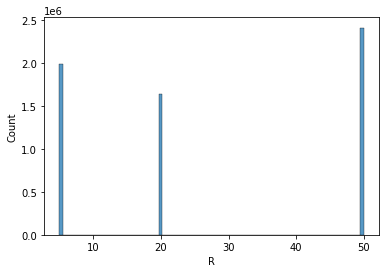

In [35]:
plt.figure()
sns.histplot(train['R'])
plt.show()

In [13]:
train['C'].unique()

array([50, 20, 10])

In [124]:
train['C'].nunique()

3

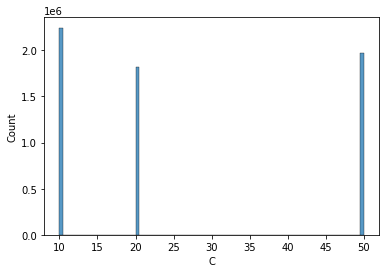

In [36]:
plt.figure()
sns.histplot(train['C'])
plt.show()

In [23]:
train['breath_id'].unique()

array([     1,      2,      3, ..., 125743, 125745, 125749])

In [123]:
train['breath_id'].nunique()

75450

In [38]:
train['breath_id'].value_counts()

1         80
83891     80
83924     80
83923     80
83922     80
          ..
41745     80
41743     80
41742     80
41741     80
125749    80
Name: breath_id, Length: 75450, dtype: int64

75450 breaths

In [29]:
import random

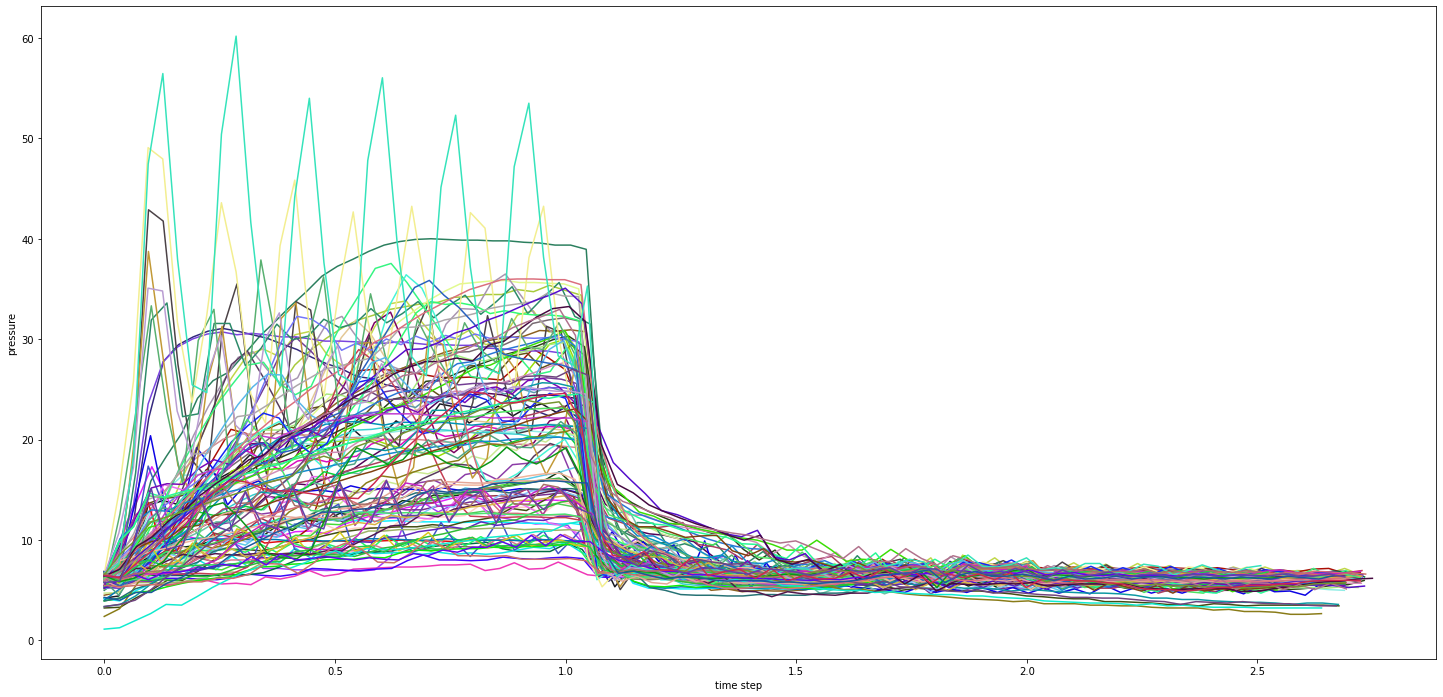

In [122]:
# plot 200 respirations au hasard parmis les 75450 (couleur au hasard aussi)
plt.figure(figsize=(25,12))
for i in np.random.randint(0,75450, 200):
  plt.plot(train['time_step'][train['breath_id'] == i], train['pressure'][train['breath_id'] == i], c=np.random.random(3))
plt.xlabel('time step')
plt.ylabel('pressure')
plt.show()

In [40]:
train['time_step'].nunique()

3767571

In [43]:
train['time_step'][0:15]

0     0.000000
1     0.033652
2     0.067514
3     0.101542
4     0.135756
5     0.169698
6     0.203708
7     0.237723
8     0.271776
9     0.305732
10    0.339675
11    0.373680
12    0.407650
13    0.441804
14    0.476103
Name: time_step, dtype: float64

time_step = float

In [44]:
# plus grande valeur de time_step
train['time_step'].iloc[-1]

2.638017416000366

In [48]:
# lier time_step et breath_id
train.groupby('breath_id')['time_step']

In [49]:
# durée de chaque respiration
train.groupby('breath_id')['time_step'].mean()

breath_id
1         1.344606
2         1.344371
3         1.262657
4         1.264007
5         1.362075
            ...   
125740    1.359689
125742    1.332208
125743    1.332587
125745    1.254346
125749    1.318740
Name: time_step, Length: 75450, dtype: float64

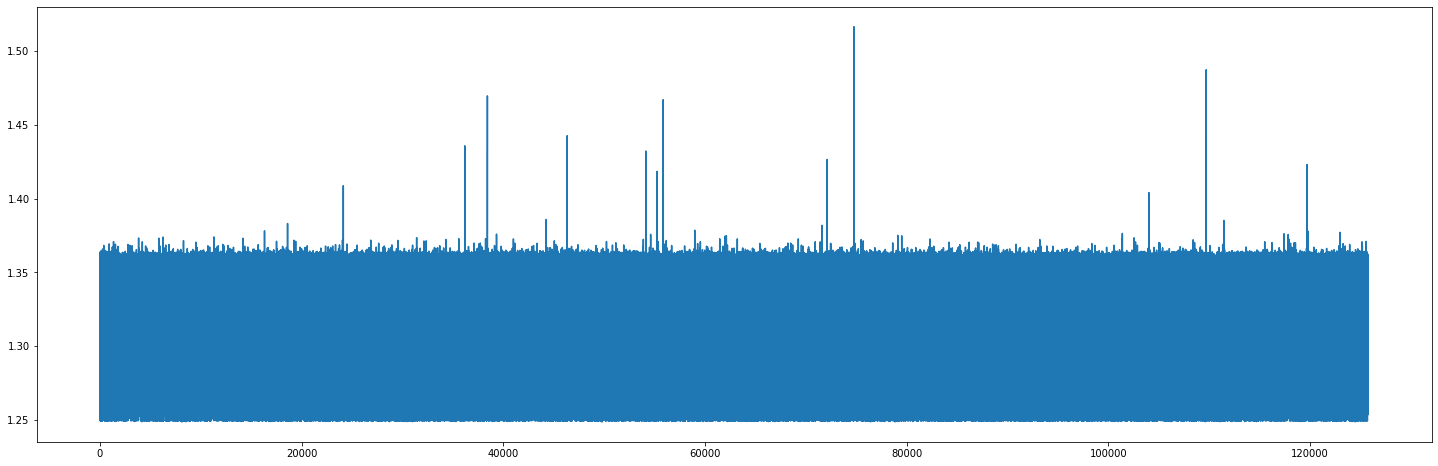

In [115]:
plt.figure(figsize=(25,8))
plt.plot(train.groupby('breath_id')['time_step'].mean())
plt.show()

In [54]:
train.groupby('breath_id')['time_step'].mean().sort_values()

breath_id
49772     1.248343
8126      1.248362
78837     1.248428
124459    1.248447
76411     1.248489
            ...   
46324     1.442626
55851     1.467093
38415     1.469664
109693    1.487416
74766     1.516630
Name: time_step, Length: 75450, dtype: float64

In [55]:
train.groupby('breath_id')['time_step'].mean().max()

1.5166297405958176

In [56]:
train.groupby('breath_id')['time_step'].mean().min()

1.2483434200286865

In [ ]:
# toutes les respirations ne sont pas équivalentes
# convert time_step en datetime ?

u_in = the control input for the inspiratory solenoid valve. Ranges from 0 to 100.

In [57]:
train['u_in'].unique()

array([ 0.08333401, 18.38304147, 22.50927777, ...,  1.55897786,
        1.27266322,  1.48273915])

In [58]:
train['u_in'].nunique()

4020300

In [59]:
train['u_in'][0:15]

0      0.083334
1     18.383041
2     22.509278
3     22.808822
4     25.355850
5     27.259866
6     27.127486
7     26.807732
8     27.864715
9     28.313036
10    26.866758
11    26.762803
12    27.993274
13    26.789898
14    25.634070
Name: u_in, dtype: float64

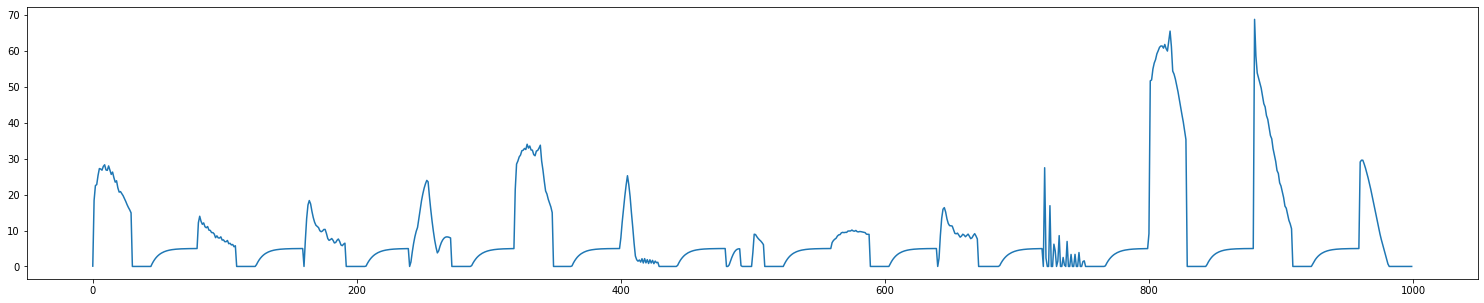

In [69]:
plt.figure(figsize=(26, 5))
plt.plot(train['u_in'][0:1000])
plt.show()

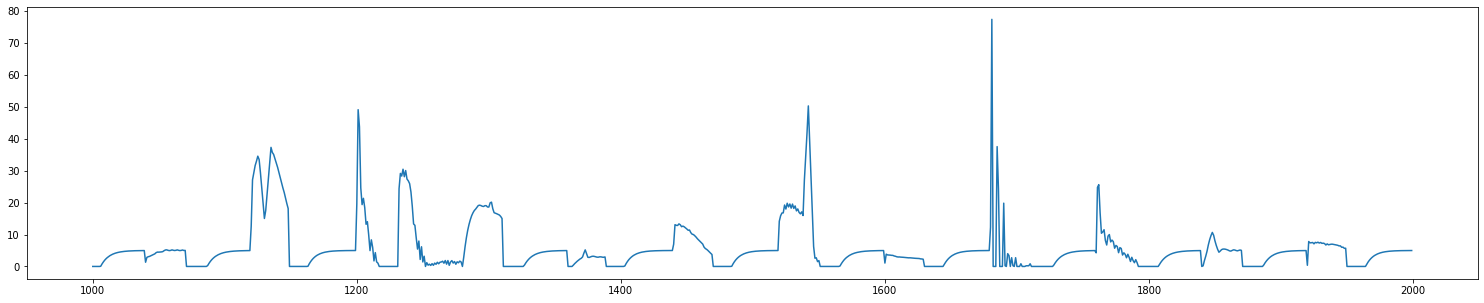

In [74]:
plt.figure(figsize=(26, 5))
plt.plot(train['u_in'][1000:2000])
plt.show()

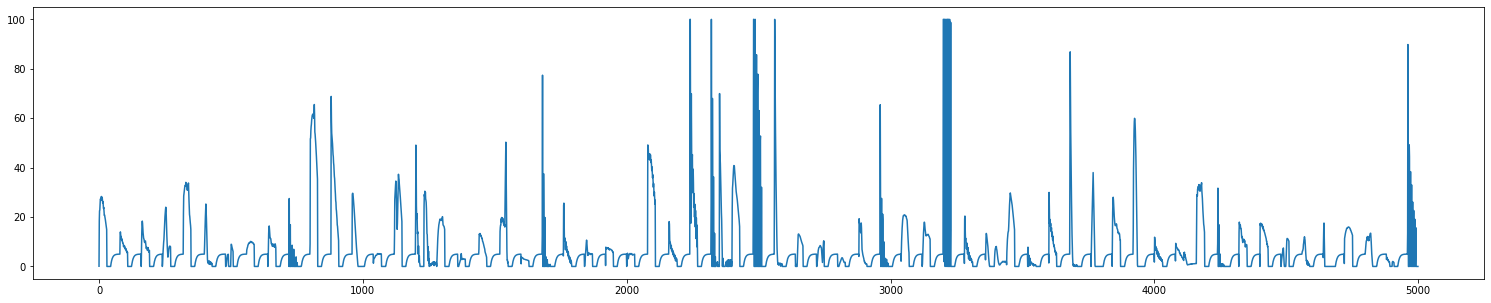

In [78]:
plt.figure(figsize=(26, 5))
plt.plot(train['u_in'][0:5000])
plt.show()

In [1]:
plt.figure(figsize=(26, 5))
plt.plot(train['u_in'][50000:51000])
plt.show()

NameError: ignored

u_out = the control input for the exploratory solenoid valve. Either 0 or 1.

In [70]:
train['u_out'].unique()

array([0, 1])

In [71]:
train['u_out'].nunique()

2

In [72]:
train['u_out'][0:15]

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
Name: u_out, dtype: int64

In [79]:
train['u_out'].value_counts()

1    3745032
0    2290968
Name: u_out, dtype: int64

In [83]:
u_out_count = train['u_out'].value_counts()
u_out_count

1    3745032
0    2290968
Name: u_out, dtype: int64

In [84]:
type(u_out_count)

pandas.core.series.Series

In [92]:
u_out_count.index

Int64Index([1, 0], dtype='int64')

In [93]:
u_out_count.values

array([3745032, 2290968])

In [114]:
plt.figure()
plt.hist(x=train['u_out'].value_counts().index, y=train['u_out'].value_counts().values.reshape(0,2))
plt.show()

ValueError: ignored

<Figure size 432x288 with 0 Axes>

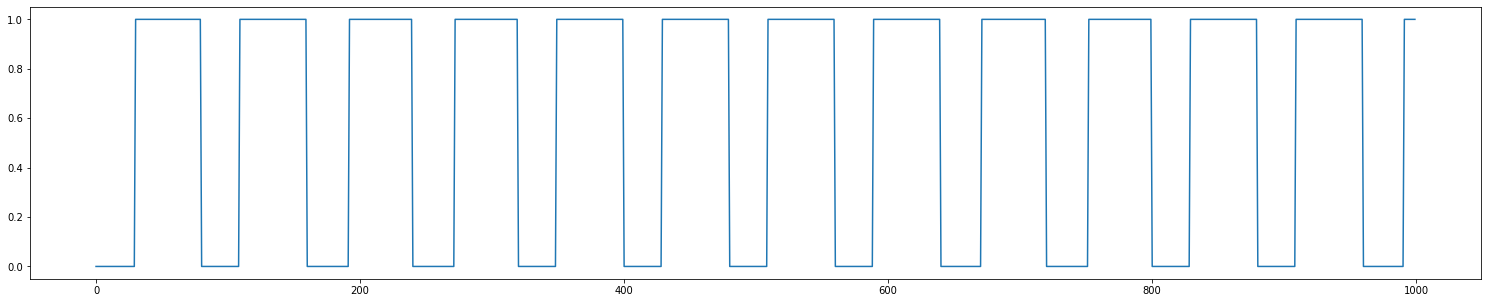

In [73]:
plt.figure(figsize=(26, 5))
plt.plot(train['u_out'][0:1000])
plt.show()

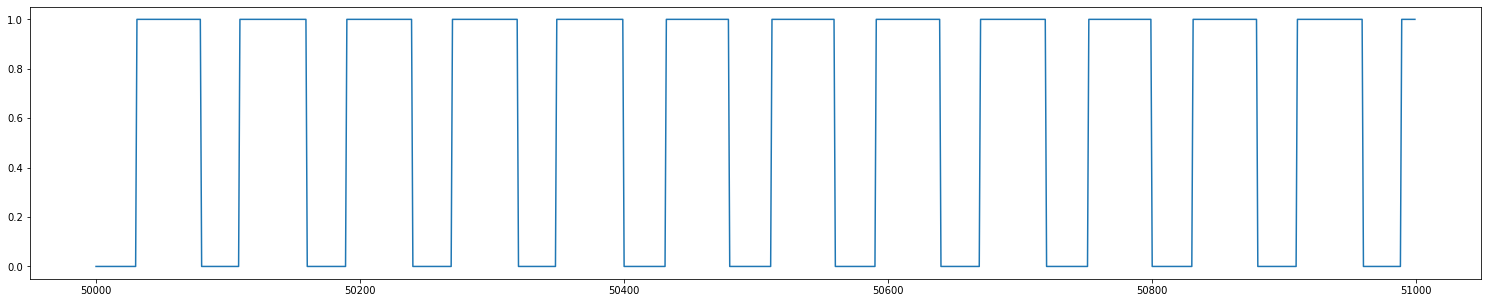

In [76]:
plt.figure(figsize=(26, 5))
plt.plot(train['u_out'][50000:51000])
plt.show()

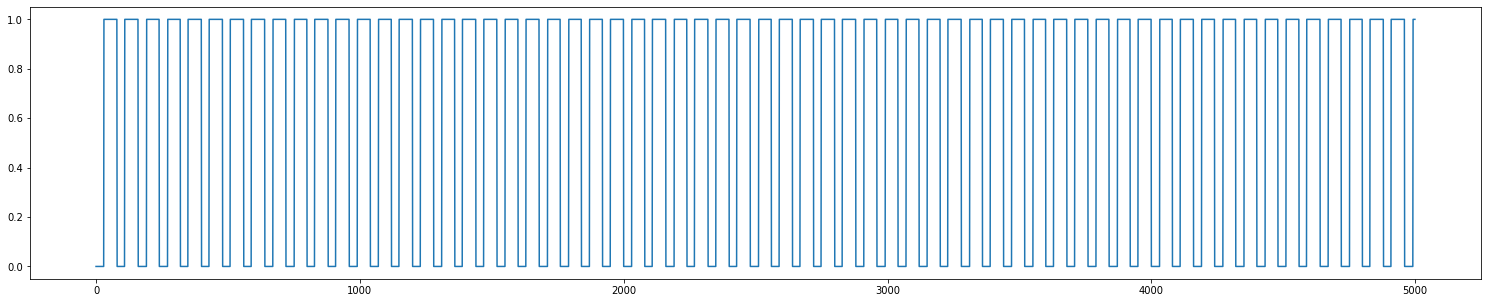

In [77]:
plt.figure(figsize=(26, 5))
plt.plot(train['u_out'][0:5000])
plt.show()

In [128]:
# u_out = 0 inspiration, u_out = 1 expiration ? 
# inspirations
train['time_step'][train['u_out'] == 0]

0          0.000000
1          0.033652
2          0.067514
3          0.101542
4          0.135756
             ...   
6035945    0.834147
6035946    0.867574
6035947    0.900917
6035948    0.934309
6035949    0.967743
Name: time_step, Length: 2290968, dtype: float64

In [129]:
# expirations
train['time_step'][train['u_out'] == 1]

30         1.021298
31         1.055426
32         1.089404
33         1.123387
34         1.157591
             ...   
6035995    2.504603
6035996    2.537961
6035997    2.571408
6035998    2.604744
6035999    2.638017
Name: time_step, Length: 3745032, dtype: float64

plot que les inspirations

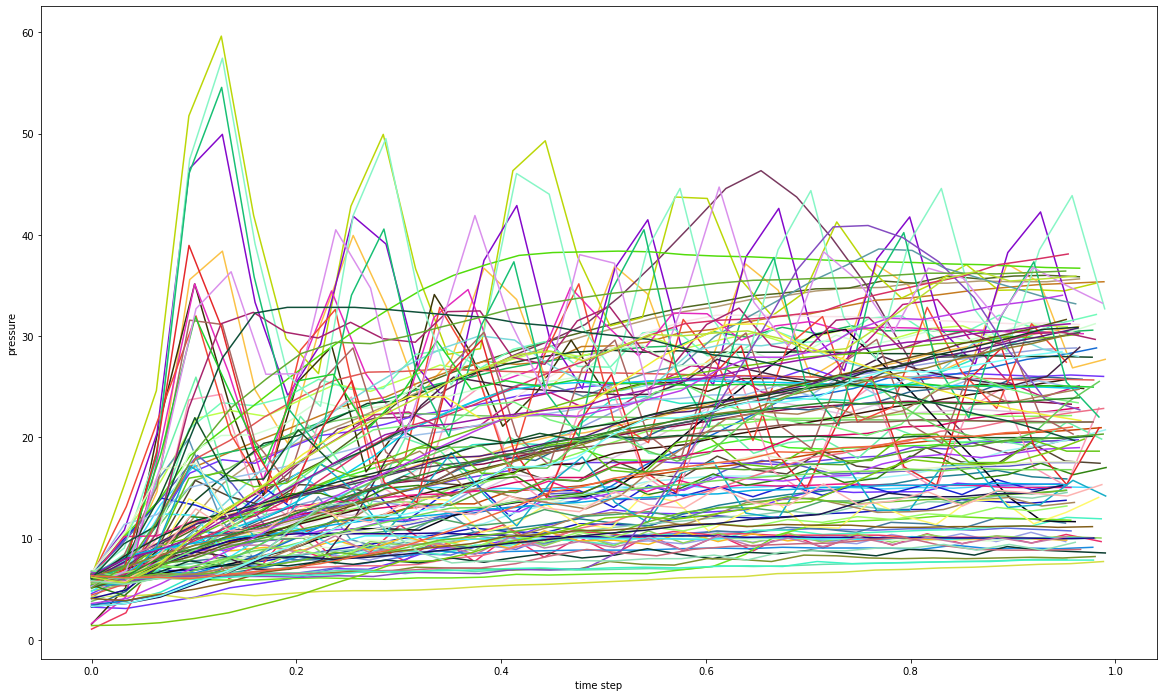

In [132]:
# plot 200 inspirations au hasard parmis les 75450 (couleur au hasard aussi)
plt.figure(figsize=(20,12))
for i in np.random.randint(0,75450, 200):
  plt.plot(train['time_step'][(train['breath_id'] == i) & (train['u_out'] == 0)], train['pressure'][(train['breath_id'] == i) & (train['u_out'] == 0)], c=np.random.random(3))
plt.xlabel('time step')
plt.ylabel('pressure')
plt.show()

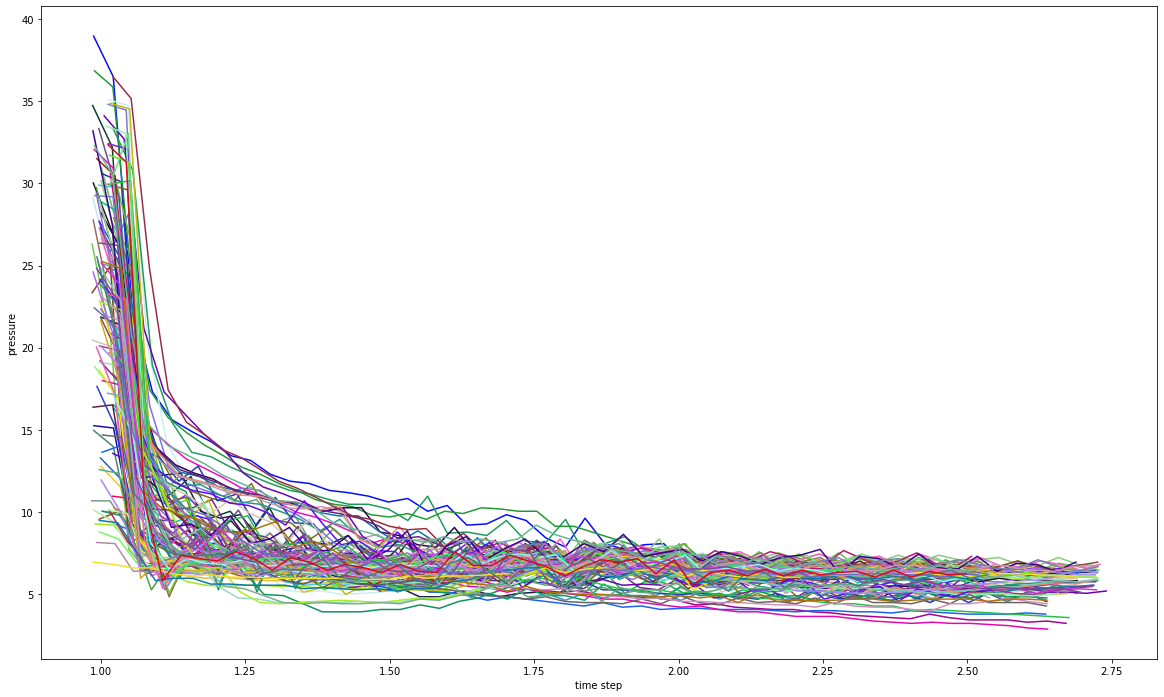

In [133]:
# plot 200 expirations au hasard parmis les 75450 (couleur au hasard aussi)
plt.figure(figsize=(20,12))
for i in np.random.randint(0,75450, 200):
  plt.plot(train['time_step'][(train['breath_id'] == i) & (train['u_out'] == 1)], train['pressure'][(train['breath_id'] == i) & (train['u_out'] == 1)], c=np.random.random(3))
plt.xlabel('time step')
plt.ylabel('pressure')
plt.show()

In [ ]:
# faire subplots et plotter chaque variable pour 100 breaths

In [142]:
train.columns

Index(['id', 'breath_id', 'R', 'C', 'time_step', 'u_in', 'u_out', 'pressure'], dtype='object')

In [149]:
features = ['R', 'C', 'u_in', 'u_out', 'pressure']

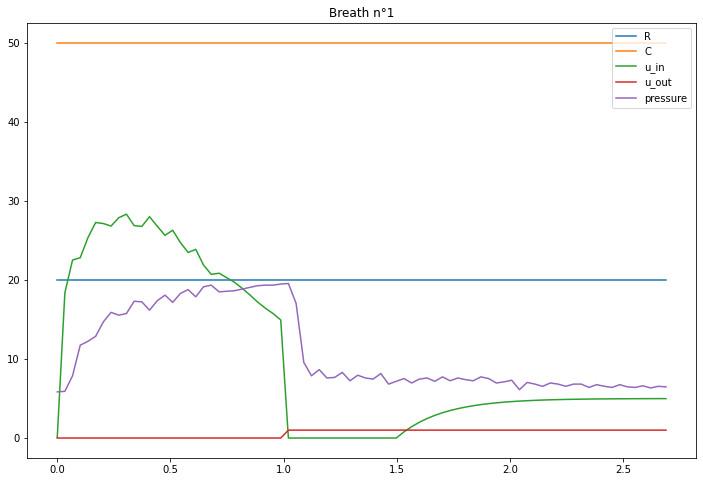

In [151]:
# plot 1 breath
plt.figure(figsize=(12,8))
for i in features:
  plt.plot(train['time_step'][train['breath_id'] == 1], train[i][train['breath_id'] == 1], label=i)
plt.legend()
plt.title('Breath n°1')
plt.show()

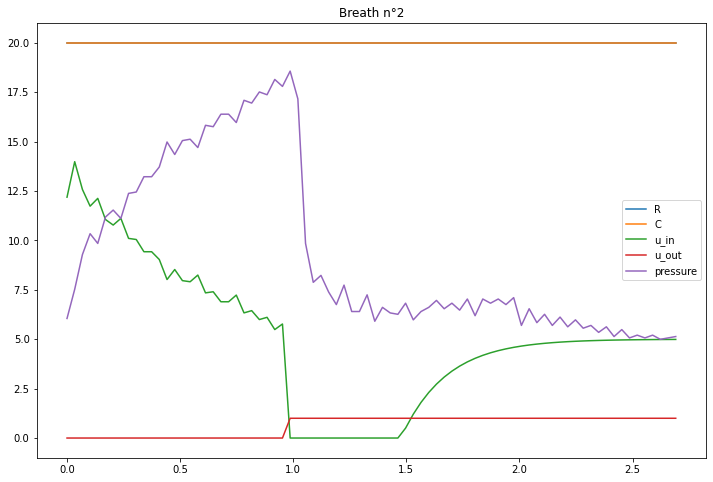

In [152]:
# plot 1 breath
plt.figure(figsize=(12,8))
for i in features:
  plt.plot(train['time_step'][train['breath_id'] == 2], train[i][train['breath_id'] == 2], label=i)
plt.legend()
plt.title('Breath n°2')
plt.show()

In [ ]:
# Valeurs manquantes
train.isna().sum()

id           0
breath_id    0
R            0
C            0
time_step    0
u_in         0
u_out        0
pressure     0
dtype: int64

In [ ]:
# Pas de valeurs manquantes

In [ ]:
# Duplicates
df.duplicated().sum()

0

In [ ]:
# Pas de duplicats

In [ ]:
# Outliers

In [ ]:
# Scaling - nécessaire car données différent ordre